In [1]:
%matplotlib inline

In [2]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append("../")

In [5]:
from src.data_pipeline.DataLoader import DataLoader
from src.utility.sys_utils import get_spark

# import result checking tools
from src.utility.Summary import Summary

In [6]:
spark = get_spark(cores=1) # change cores up to 6 if needed
data_loader = DataLoader(spark, "ml-20m-5p")

Using sampled subset with 6.896900E+04 records
Using split of range (0, 0.2), test set contains 19365 of 68969 records in total.


# Visualization of Scalability plot

In [7]:
summary = Summary(data_loader.get_config().db_path)
summary

### running time

In [8]:
import pandas as pd
# print dataframe. 
data = [['ALS',50.4,60.0,108.0],['ALS_NEG',44.0,59.7,110.0]\
      ,['KNN',34.5,65.0,131.0],['BL_CNT',24.4,37.6,82.0],['BL_AVG',26.5,31.5,40.3]]

df = pd.DataFrame(data, columns = ['Model','ml-20m-5p','ml-20m-10p','ml-20m-20p'])
df

,Model,ml-20m-5p,ml-20m-10p,ml-20m-20p
0,ALS,50.4,60.0,108.0
1,ALS_NEG,44.0,59.7,110.0
2,KNN,34.5,65.0,131.0
3,BL_CNT,24.4,37.6,82.0
4,BL_AVG,26.5,31.5,40.3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


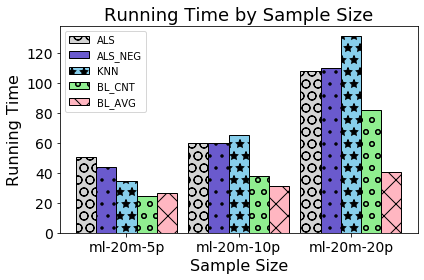

In [42]:
import numpy as np
import matplotlib.pyplot as plt
n_groups = 3

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.18
opacity = 0.6

rects1 = plt.bar(index, df.iloc[0,1:4], bar_width,
color='lightgrey',
edgecolor="black",
hatch='O',
label='ALS')

rects2 = plt.bar(index + bar_width, df.iloc[1,1:4], bar_width,
color='slateblue',
edgecolor="black",
hatch='.',
label='ALS_NEG')

rects3 = plt.bar(index + 2*bar_width, df.iloc[2,1:4], bar_width,
color='skyblue',
edgecolor="black",
hatch='*',
label='KNN')

rects4 = plt.bar(index + 3*bar_width, df.iloc[3,1:4], bar_width,
color='lightgreen',
edgecolor="black",
hatch='o',
label='BL_CNT')

rects5 = plt.bar(index + 4*bar_width, df.iloc[4,1:4], bar_width,
color='lightpink',
edgecolor="black",
hatch='X',
label='BL_AVG')

plt.xlabel('Sample Size',fontsize=16)
plt.ylabel('Running Time',fontsize=16)
plt.title('Running Time by Sample Size',fontsize=18)
plt.xticks(index + 2*bar_width, ('ml-20m-5p','ml-20m-10p','ml-20m-20p'),fontsize=14)
plt.yticks(fontsize=14)
plt.legend()

plt.tight_layout()
plt.savefig('by_sample_size_running_time.eps', format='eps')
plt.show()

### Performance NDCG@10

In [11]:
df_ndcg = pd.DataFrame(data = [['ALS'],['ALS_NEG'],['KNN'],['BL_CNT'],['BL_AVG']], columns = ['Model'])

df_ndcg['ml-20m-5p'] = None
df_ndcg['ml-20m-10p'] = None
df_ndcg['ml-20m-20p'] = None
df_ndcg

,Model,ml-20m-5p,ml-20m-10p,ml-20m-20p
0,ALS,None,None,None
1,ALS_NEG,None,None,None
2,KNN,None,None,None
3,BL_CNT,None,None,None
4,BL_AVG,None,None,None


In [12]:
final_model = pd.DataFrame(data=[['ALS','ALS_MF',"[('maxIter', 15), ('num_neg', 0), ('rank', 32), ('regParam', 0.5)]",\
         "[('maxIter', 15), ('num_neg', 0), ('rank', 64), ('regParam', 0.05)]",\
         "[('maxIter', 15), ('num_neg', 0), ('rank', 64), ('regParam', 0.05)]"]\
        ,['ALS_NEG','ALS_MF',"[('maxIter', 15), ('num_neg', 3), ('rank', 4), ('regParam', 0.5)]",\
          "[('maxIter', 15), ('num_neg', 3), ('rank', 64), ('regParam', 0.05)]",\
          "[('maxIter', 15), ('num_neg', 3), ('rank', 64), ('regParam', 0.05)]"]\
        ,['KNN','KNN',"[('k', 5)]","[('k', 5)]","[('k', 5)]"]\
        ,['BL_CNT','BaseLine',"[('model', 'count_rank_rating')]","[('model', 'count_rank_rating')]","[('model', 'count_rank_rating')]"]\
        ,['BL_AVG','BaseLine',"[('model', 'avg_rating')]","[('model', 'avg_rating')]","[('model', 'avg_rating')]"]],columns = ['Model','m','ml-20m-5p','ml-20m-10p','ml-20m-20p'])
final_model

,Model,m,ml-20m-5p,ml-20m-10p,ml-20m-20p
0,ALS,ALS_MF,"[('maxIter', 15), ('num_neg', 0), ('rank', 32)...","[('maxIter', 15), ('num_neg', 0), ('rank', 64)...","[('maxIter', 15), ('num_neg', 0), ('rank', 64)..."
1,ALS_NEG,ALS_MF,"[('maxIter', 15), ('num_neg', 3), ('rank', 4),...","[('maxIter', 15), ('num_neg', 3), ('rank', 64)...","[('maxIter', 15), ('num_neg', 3), ('rank', 64)..."
2,KNN,KNN,"[('k', 5)]","[('k', 5)]","[('k', 5)]"
3,BL_CNT,BaseLine,"[('model', 'count_rank_rating')]","[('model', 'count_rank_rating')]","[('model', 'count_rank_rating')]"
4,BL_AVG,BaseLine,"[('model', 'avg_rating')]","[('model', 'avg_rating')]","[('model', 'avg_rating')]"


In [13]:
for data_set in ["ml-20m-5p","ml-20m-10p","ml-20m-20p"]:
    for i in range(5) :
        #print(data_set)
        #print(i)
        sum_df = summary.get_model_test_perf(data_set, final_model.loc[i,'m'])
        df_ndcg.loc[i,data_set]= sum_df.loc[(sum_df.metric=="ndcg@10") & (sum_df.hyper==final_model.loc[i,data_set])].iloc[0]['value']


In [14]:
df_ndcg

,Model,ml-20m-5p,ml-20m-10p,ml-20m-20p
0,ALS,0.01169,0.00928001,0.0101528
1,ALS_NEG,0.0116649,0.00928001,0.0101528
2,KNN,0.0155543,0.00696797,0.00337751
3,BL_CNT,0.0122137,0.00672112,0.00508466
4,BL_AVG,0.0122137,0.00647449,0.00442355


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


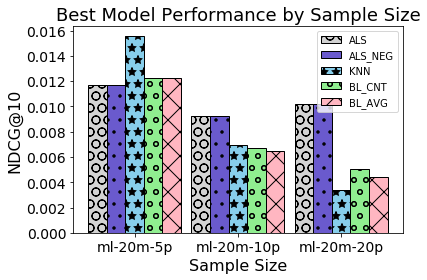

In [41]:
import numpy as np
import matplotlib.pyplot as plt
n_groups = 3

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.18
opacity = 0.6

rects1 = plt.bar(index, df_ndcg.iloc[0,1:4], bar_width,
color='lightgrey',
edgecolor="black",
hatch='O',
label='ALS')

rects2 = plt.bar(index + bar_width, df_ndcg.iloc[1,1:4], bar_width,
color='slateblue',
edgecolor="black",
hatch='.',
label='ALS_NEG')

rects3 = plt.bar(index + 2*bar_width, df_ndcg.iloc[2,1:4], bar_width,
color='skyblue',
edgecolor="black",
hatch='*',
label='KNN')

rects4 = plt.bar(index + 3*bar_width, df_ndcg.iloc[3,1:4], bar_width,
color='lightgreen',
edgecolor="black",
hatch='o',
label='BL_CNT')

rects5 = plt.bar(index + 4*bar_width, df_ndcg.iloc[4,1:4], bar_width,
color='lightpink',
edgecolor="black",
hatch='X',
label='BL_AVG')

plt.xlabel('Sample Size',fontsize=16)
plt.ylabel('NDCG@10',fontsize=16)
plt.title('Best Model Performance by Sample Size',fontsize=18)
plt.xticks(index + 2*bar_width, ('ml-20m-5p','ml-20m-10p','ml-20m-20p'),fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig('by_sample_size_best_model_performance.eps', format='eps')
plt.show()
#plt.savefig('best_model_performance_by_sample_size.eps', format='eps')